# Vlasov equation


\begin{equation} \left\{\begin{matrix}
\frac{\mathrm{d}\mathbf{x}_\epsilon}{\mathrm{d}t}&=& \mathbf{v}_\epsilon, & \hspace{1cm} \mathbf{x}_\epsilon(s) = \mathbf{x}\\
\frac{\mathrm{d}\mathbf{v}_\epsilon}{\mathrm{d}t} &=& \frac{1}{\epsilon}(\mathbf{v}_\epsilon)^\perp + \mathbf{E}(\mathbf{x}_\epsilon),& \hspace{1cm}\mathbf{v}_\epsilon(s)=\mathbf{v}
\end{matrix}\right. 
\end{equation}
with $\displaystyle{(\mathbf{v}_\epsilon)^\perp=(0,\mathbf{v}_{\epsilon,3},-\mathbf{v}_{\epsilon,2} )^\intercal}$, 


## Non uniform stationary electric field

If we take the electric field $\mathbf{E}(\mathbf{x})$ as 
$$\mathbf{E} (\mathbf{x}) = c\begin{pmatrix} -\mathbf{x}_1 \\ \frac{\mathbf{x}_2}{2} \\ \frac{\mathbf{x}_3}{2} \end{pmatrix}$$
with $c > 0$

Then this system describes the dynamics of a charged particle in an ideal Penning trap.

Under the assumption $\displaystyle{\frac{1}{\varepsilon} > \sqrt{2c}}$ we have an analytical solution to this problem that can be written as

$$\left\{\begin{matrix}\mathbf{x}_\varepsilon(t) = \begin{pmatrix} 
c_1\cos(\sqrt{c}(t-s)) + c_2\sin(\sqrt{c}(t-s)) \\
a_1\sin(a_\varepsilon(t-s)) - a_2\cos(a_\varepsilon(t-s)) + b_1\sin(b_\varepsilon(t-s)) - b_2\cos(b_\varepsilon(t-s))  \\
a_1\cos(a_\varepsilon(t-s)) + a_2\cos(a_\varepsilon(t-s)) + b_1\cos(b_\varepsilon(t-s)) + b_2\cos(b_\varepsilon(t-s)) 
\end{pmatrix} \\
\mathbf{v}_\varepsilon(t) = \frac{\mathrm{d}\mathbf{x}_\varepsilon}{\mathrm{d}t} \end{matrix}\right.  $$


## Imports

In [1]:
import sys
sys.path.append('../Euler')
sys.path.append('../RK')
sys.path.append('../Parareal')
sys.path.append('../Stormer')
sys.path.append('../Problems')

import Vlasov as V
import matplotlib.pyplot as plt
import numpy as np
import parareal as para
import HamiltonianFunctions as func
import RK4 as RK4




## Constants

In [2]:
s = 0
eps = 0.01
x = np.longdouble([1,1,1])
v = np.longdouble([1,eps,0])

y0 = np.concatenate((x,v))
c = 2

T = 500*eps
kmax = 10


## Relative error computation and plot

### Relative error depending on N

T: 5.0
N: 2
delta_t: 2.5
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 4
delta_t: 1.25
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 8
delta_t: 0.625
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 16
delta_t: 0.3125
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 32
delta_t: 0.15625
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 64
delta_t: 0.078125
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10

T: 5.0
N: 128
delta_t: 0.0390625
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10



[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, 'Relative Error')]

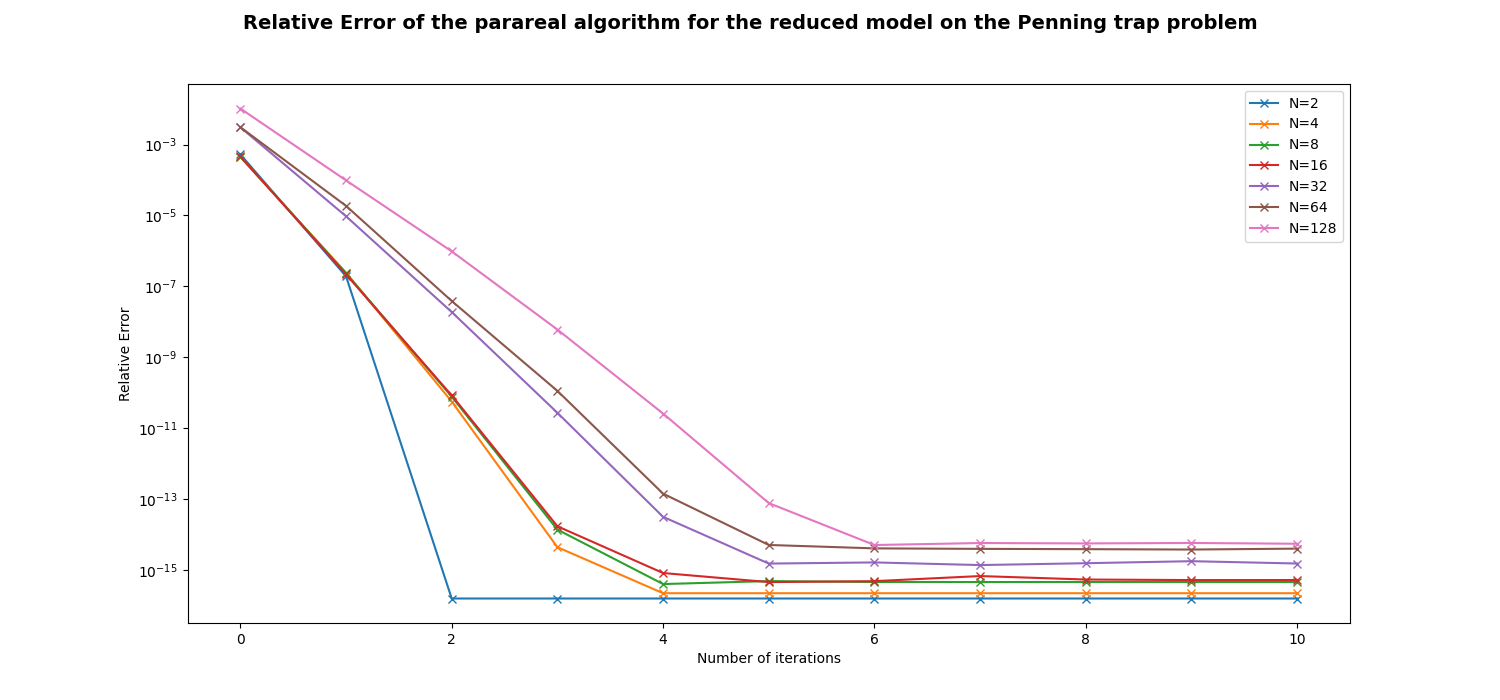

In [3]:
%matplotlib widget
fig1,ax1 = plt.subplots(1,figsize=(15,7))
fig1.suptitle(f"Relative Error of the parareal algorithm for the reduced model on the Penning trap problem",fontsize='14',fontweight='bold')

for m in range(7):
    N = 2**(m+1)
    delta_t = T/N
    tab_t = np.linspace(s,T,N+1)
    ans = V.sol_ex_tab(tab_t,s,x,v,c,eps)
    normans = np.zeros(N+1)
    for n in range(N+1):
        normans[n] = np.linalg.norm(ans[n],1)
    maxans = np.max(normans)

    tab_y = para.parareal_bis_vlasov(func.Vlasov, V.sol_ex,V.sol_approx, y0, c,eps, delta_t,T,kmax)
    print("")
    err = np.zeros((kmax+1,N+1))
    Err= np.zeros(kmax+1)
    for k in range(kmax+1):
        for n in range(N+1):
            err[k,n]= np.linalg.norm(ans[n] - tab_y[k+1,n,:],1)
        Err[k] = np.max(err[k])/maxans
    ax1.plot([k for k in range(kmax+1)],Err,'x-')
ax1.set_yscale('log')
ax1.legend(['N=2','N=4','N=8','N=16','N=32','N=64','N=128'])
ax1.set(xlabel= "Number of iterations", ylabel ="Relative Error")

## Absolute error 

### Absolute error of the reduced model depending on $\varepsilon$

[Text(0.5, 0, 'ε'), Text(0, 0.5, 'Error')]

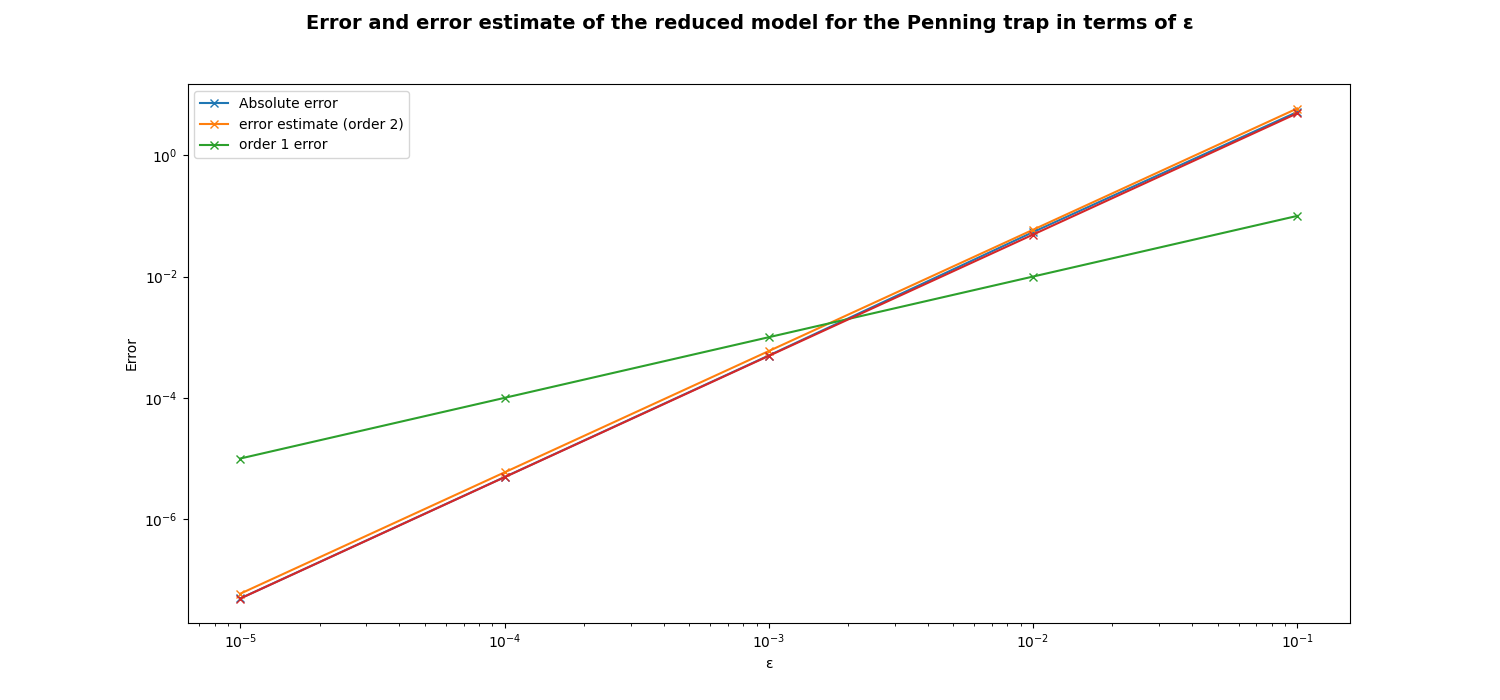

In [5]:

fig2,ax2 = plt.subplots(1,figsize=(15,7))
fig2.suptitle(f"Error and error estimate of the reduced model for the Penning trap in terms of \u03b5",fontsize='14',fontweight='bold')
N = 16
T = 2*np.pi*5
delta_t = T/N
tab_t = np.linspace(s,T,N+1)
tab_err = []
tab_eps = np.array([0.1,0.01,0.001,0.0001,0.00001])
for epsilon in tab_eps:
    ans = V.sol_ex_mat(func.Vlasov,s,T,y0,c,epsilon)
    tab_y = V.sol_approx(func.Vlasov,s,T,y0,c,epsilon)
    tab_err.append(np.linalg.norm(ans-tab_y,np.inf))
ax2.loglog(tab_eps,tab_err,'x-')
ax2.loglog(tab_eps,(3*c/2*(1+T) + c**2 * T**2 /8)* np.power(tab_eps,2),'x-')
ax2.loglog(tab_eps, tab_eps,'x-')
ax2.loglog(tab_eps,np.abs(c*(T**2*c/8 -1))*np.power(tab_eps,2),'x-')
ax2.legend(['Absolute error','error estimate (order 2)','order 1 error'])
ax2.set(xlabel="\u03b5", ylabel="Error")


### Absolute error of the reduced model depending on time

[Text(0.5, 0, 'T'), Text(0, 0.5, 'Error')]

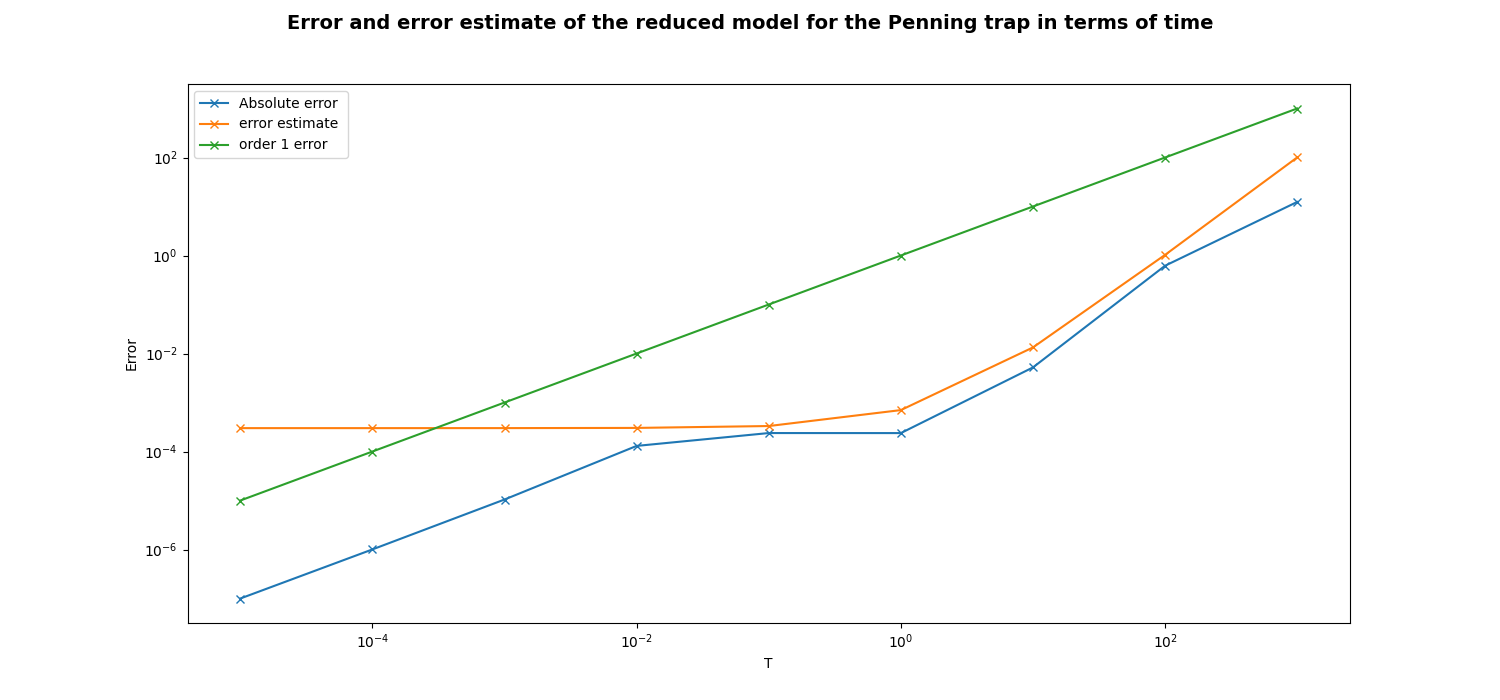

In [6]:

fig3,ax3 = plt.subplots(1,figsize=(15,7))
fig3.suptitle(f"Error and error estimate of the reduced model for the Penning trap in terms of time",fontsize='14',fontweight='bold')
T = 2*np.pi*1
tab_err = []

tab_T = np.array([1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001])
for T in tab_T:
    ans = V.sol_ex_mat(func.Vlasov,s,T,y0,c,eps)
    tab_y = V.sol_approx(func.Vlasov,s,T,y0,c,eps)
    tab_err.append(np.linalg.norm(ans-tab_y,np.inf))
ax3.loglog(tab_T,tab_err,'x-')
ax3.loglog(tab_T,(3*c/2*(1+tab_T) + c**2 * np.power(tab_T,2) /4)*eps**2,'x-')
ax3.loglog(tab_T, tab_T,'x-')

ax3.legend(['Absolute error','error estimate ','order 1 error'])
ax3.set(xlabel="T", ylabel="Error")


### Absolute error of the parareal algorithm with the reduced model

T: 5.0
N: 128
delta_t: 0.0390625
c: 2
eps: 0.01
kmax: 10
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
1.5258789062500003e-09


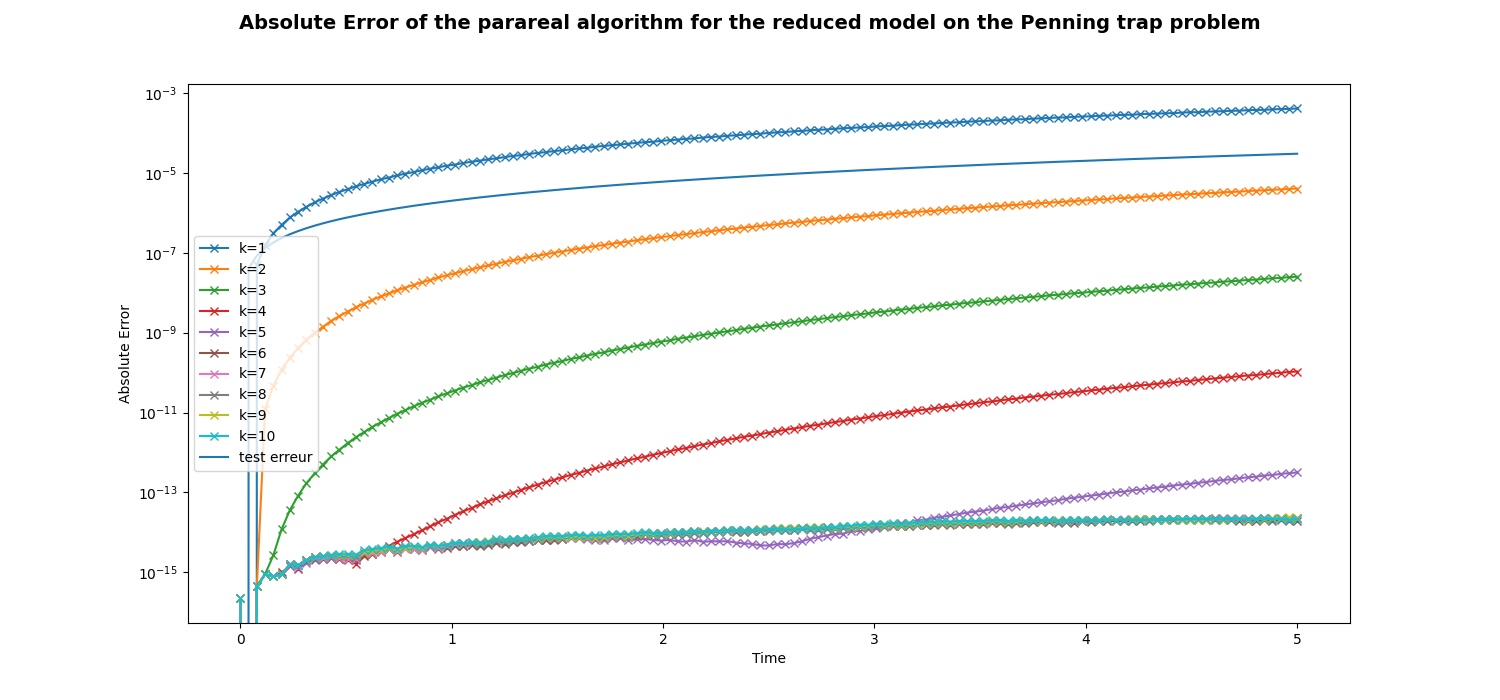

In [4]:

fig4,ax4 = plt.subplots(1,figsize=(15,7))
fig4.suptitle(f"Absolute Error of the parareal algorithm for the reduced model on the Penning trap problem",fontsize='14',fontweight='bold')


N = 128
delta_t = T/N
tab_t = np.linspace(s,T,N+1)
ans = V.sol_ex_tab(tab_t,s,x,v,c,eps)

tab_y = para.parareal_bis_vlasov(func.Vlasov, V.sol_ex,V.sol_approx, y0, c,eps, delta_t,T,kmax)

err = np.zeros((kmax+1,N+1))


for k in range(kmax+1):
    for n in range(N+1):
        err[k,n]= np.linalg.norm(ans[n] - tab_y[k+1,n,:],1)
for k in range(1,kmax +1):
    ax4.plot(np.linspace(s,T,N+1),err[k],'x-')
ax4.plot(np.linspace(s,T,N+1), eps**3*(np.linspace(s,T,N+1)+np.linspace(s,T,N+1)**2))
ax4.set_yscale('log')
ax4.legend(["k=1","k=2","k=3","k=4","k=5","k=6","k=7","k=8","k=9","k=10","test erreur"])
ax4.set(xlabel= "Time", ylabel ="Absolute Error")
print(eps**3*delta_t**2)